# Statistical Rethinking: Chapter 5 Practice Answers

We use some of the code from [the pymc-devs Python/pymc3 port of the Statistical Rethinking code examples](https://github.com/pymc-devs/resources/blob/master/Rethinking_2/).

### 5E1

(2) and (4). (3) is not because there is only one slope variable, $\beta$. In the case of (2) the value of $\alpha$ is just zero.

### 5E2

Since multiple regression gives you the relationship between one predictor and another once we conditional on other predictors, it serves as a natural way to control for variables. As a result, we can just define a model with latitude and plant diversity predictors. I'm unsure how to define priors for $\alpha$ because I'm not sure how animal or plant diversity is measured and what the bounds are. The $\beta$ variables would be normally distributed since in principle there could be a negative correlation, and in fact my limited knowledge of ecology would say that the closer latitude is to zero the more plant diversity there would be.

$$ A_i \sim \text{Normal}(\mu, \sigma)$$
$$ \mu = \alpha + \beta_L L_i + \beta_P P_i$$
$$ \alpha \sim ? $$
$$ \beta_L \sim \text{Normal}(?, ?)$$
$$ \beta_P \sim \text{Normal}(?, ?)$$
$$ \sigma \sim \text{Exponential}(1)$$


### 5E3

To answer this question, we need 3 models. Two models are linear regression using just one predictor variable (funding or size of laboratory). The third model is the multiple regression model that uses both of those variables as predictors. I'll leave out the priors in the definitions. If the variables are positively associated, then the slope parameters will be positive.

#### Model 1
$$ T_i \sim \text{Normal}(\mu, \sigma)$$
$$ \mu = \alpha + \beta_F F_i $$

#### Model 2
$$ T_i \sim \text{Normal}(\mu, \sigma)$$
$$ \mu = \alpha + \beta_L L_i $$

#### Model 3
$$ T_i \sim \text{Normal}(\mu, \sigma)$$
$$ \mu = \alpha +  \beta_F F_i + \beta_L L_i $$

### 5E4

**I'm unsure about this**. (4) and (5) are definitely equivalent, but I'm not sure about the _inferential equivalence_ of the other models.

### 5M1

This spurious correlation would occur when one of the predictors tells you a lot about the other one. For example, your height might be a predictor of how many points you score per game in basketball. Dollars earnt from basketball might also be a predictor of the amount of points you score per game. The idea would be that once you use dollars earnt and height as predictors together, the correlation between outcome and one of the predictors should vanish. Let's imagine that negative points means conceding points.

In [146]:
import scipy.stats as stats

In [147]:
# Number of examples
N = 50
height = stats.norm.rvs(185, 20, size=N)

In [148]:
height

array([193.3351257 , 153.6902885 , 200.65471585, 190.53763425,
       180.98851   , 182.66900694, 198.41080665, 202.72084006,
       167.70898539, 189.74097041, 156.32445316, 165.16800582,
       176.99774084, 194.87392233, 188.9596243 , 184.04492606,
       206.60327238, 193.01494765, 193.97294273, 191.415852  ,
       171.63347821, 169.82908381, 192.1105687 , 210.22466085,
       189.64924946, 175.13583421, 181.11374039, 206.10547774,
       172.12708647, 181.04357214, 186.46028839, 167.63311953,
       161.04228458, 221.43154475, 164.24218828, 202.22687692,
       205.20244433, 150.92859706, 217.35065185, 166.55858055,
       170.65210395, 181.87741553, 200.20381098, 227.09913327,
       163.36737272, 192.1298336 , 182.59916539, 217.13892828,
       173.11974354, 155.8988693 ])

In [149]:
points = (height - height.mean())*0.5 + stats.norm.rvs(30, 4, size=N)

In [150]:
points

array([36.14863386, 10.58680236, 45.71566387, 33.9048793 , 24.45551733,
       24.30597705, 37.45772963, 36.95698177, 17.93663194, 26.55768016,
       12.945467  , 18.00380123, 30.0874156 , 33.08664435, 31.82791262,
       34.05397876, 42.86903317, 34.09101184, 38.08884066, 28.30926512,
       24.18711892, 19.79027824, 33.36191328, 38.28749265, 26.19317904,
       17.9728526 , 23.71788549, 43.49311015, 22.77035758, 29.07854498,
       29.19665929, 12.81976002, 14.90023205, 45.53729025, 21.38866766,
       32.10449998, 46.17565235, 19.92561545, 43.80819231, 19.11933503,
       33.36160663, 27.00259726, 36.65782773, 55.68317909, 16.41161801,
       31.1416787 , 27.80501939, 47.45281786, 26.23425869, 11.51407636])

In [151]:
dollars = (points - points.mean())*2000 + stats.norm.rvs(150000, 30000, size=N)

In [152]:
dollars

array([179253.37100925, 130602.59153023, 184752.11817641, 147922.34774321,
       116088.59798163, 189376.71933112, 206963.12332709, 158904.02754481,
       109041.38200815, 141766.35052355, 117977.34832746,  83327.98305097,
       117690.42045681, 170466.51541942, 216914.64315307, 166431.94665856,
       147553.15242836, 162933.81480723, 170160.98622136, 190693.02737686,
       105246.49747649,  93539.51952856, 145948.56568025, 184452.38790252,
       164133.70495543, 138842.70305243, 149355.32866659, 166811.92423944,
       106579.10806621, 174513.93906957, 153570.30610232,  85169.94722118,
        58428.51763745, 143780.37618005, 112909.37600124, 171312.91053284,
       164831.47776397, 129690.99230012, 191797.24851623, 115700.08213361,
       135990.68615717, 150406.99057169, 142296.24788858, 277905.26212568,
       129254.67481329, 199786.85901095, 129040.25890531, 193648.87222236,
       140212.06259285,  98771.26172919])

In [196]:
import pymc3 as pm

In [154]:
height_std = (height - height.mean()) / height.std()
points_std = (points - points.mean()) / points.std()
dollars_std = (dollars - dollars.mean()) / dollars.std()

Now let's define some models and do inference. First let's predict dollars earnt based off of points.

In [155]:
with pm.Model() as m1:
    sigma = pm.Lognormal('sigma', mu=1, sd=2)
    alpha = pm.Normal('alpha', mu=0, sd=1)
    beta = pm.Normal('beta', mu=0, sd=1)
    mu = alpha + beta*(points_std - points_std.mean())
    dollars_preds = pm.Normal('dollars', mu=mu, sd=sigma, observed=dollars_std)

In [174]:
def plot_predictive(prior_check):
    _, ax = plt.subplots()

    x = np.linspace(-2.5, 2.5, 50)

    for a, b in zip(prior_check["alpha"], prior_check["beta"]):
        y = a + b * x
        ax.plot(x, y, c="k", alpha=0.4)

    ax.set_xlabel("Predictor")
    ax.set_ylabel("Mean Outcome")

In [156]:
with m1:
    prior_check = pm.sample_prior_predictive()

In [157]:
import matplotlib.pyplot as plt
import numpy as np

In [160]:
with m1:
    trace = pm.sample(1000, tune=1000)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.


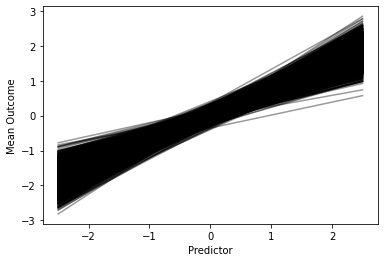

In [161]:
plot_predictive(trace)

Now let's predict dollars earnt based off of height

In [162]:
with pm.Model() as m1:
    sigma = pm.Lognormal('sigma', mu=1, sd=2)
    alpha = pm.Normal('alpha', mu=0, sd=1)
    beta = pm.Normal('beta', mu=0, sd=1)
    mu = alpha + beta*(height_std)
    dollars_preds = pm.Normal('dollars', mu=mu, sd=sigma, observed=dollars_std)

In [163]:
with m1:
    trace = pm.sample(1000, tune=1000)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


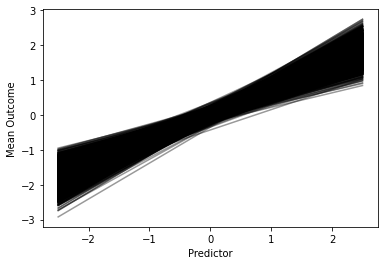

In [166]:
plot_predictive(trace)

Now let's define some models and do inference. Now let's predict dollars earnt based off of height and points

In [169]:
with pm.Model() as m1:
    sigma = pm.Lognormal('sigma', mu=1, sd=2)
    alpha = pm.Normal('alpha', mu=0, sd=1)
    beta = pm.Normal('beta', mu=0, sd=1)
    beta_2 = pm.Normal('beta_2', mu=0, sd=1)
    mu = alpha + beta*(height_std) + beta_2*(points_std)
    dollars_preds = pm.Normal('dollars', mu=mu, sd=sigma, observed=dollars_std)

In [171]:
with m1:
    trace = pm.sample(1000, tune=1000)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_2, beta, alpha, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


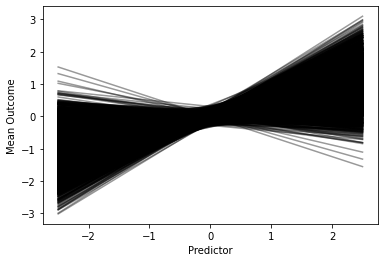

In [175]:
plot_predictive(trace)

Adapt plots to use the second beta coefficient, corresponding to points scored.

In [176]:
def plot_predictive(prior_check):
    _, ax = plt.subplots()

    x = np.linspace(-2.5, 2.5, 50)

    for a, b in zip(prior_check["alpha"], prior_check["beta_2"]):
        y = a + b * x
        ax.plot(x, y, c="k", alpha=0.4)

    ax.set_xlabel("Predictor")
    ax.set_ylabel("Mean Outcome")

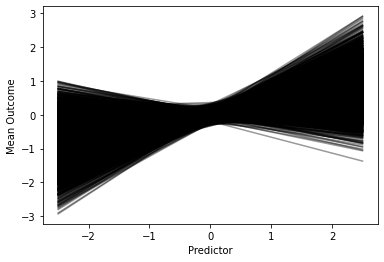

In [177]:
plot_predictive(trace)

Note how the ranges for valid posteriors are much wider in the multiple regression, and even account for negative relationships between predictors and outcomes, when the singe-predictor linear regression was far less equivocal.

### 5M2

As an example of a masked relationship, we will do multiple regression to predict climbing grades. The predictor variables will be finger strength and weight. Finger strength is positively associated with the grade someone can climb. Weight is negatively associated. But finger strength is positively associated with weight.

What we expect is that there will be an unclear bivariate relationship between finger strength and climbing grade, but when multiple regression is used, the coefficient for finger strength will become very positive.

In [224]:
# Start by constructing our data.

grade_ewbanks = np.array([14,  15,  16,   14,  15,  16,  14,  15,  16,  14,  15,  16,   17])
strength_kN =    np.array([400, 500, 600, 700, 710, 720, 750, 920, 930, 940, 950, 960, 1000])
weight_kg =      np.array([ 60,  62,  64,  68,  70,  72,  74,  78,  80,  82,  84,  86,   90])

In [230]:
# Start by constructing our data.

grade_ewbanks = np.array([14,  15, 14, 15])
strength_kN =    np.array([400, 500, 600, 700])
weight_kg =      np.array([ 60,  60, 70, 70])

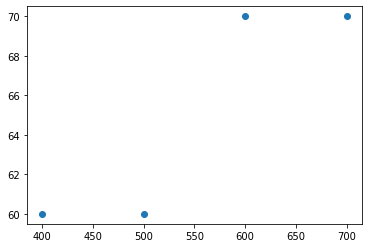

In [231]:
plt.scatter(strength_kN, weight_kg)

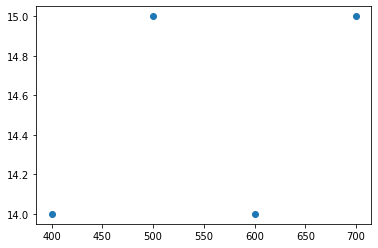

In [232]:
plt.scatter(strength_kN, grade_ewbanks)

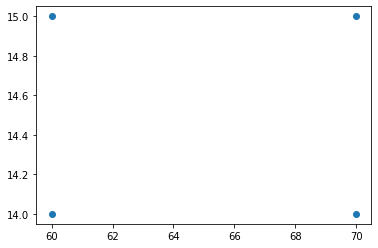

In [233]:
plt.scatter(weight_kg, grade_ewbanks)

In [234]:
weight_std = (weight_kg - weight_kg.mean()) / weight_kg.std()
strength_std = (strength_kN - strength_kN.mean()) / strength_kN.std()
grade_std = (grade_ewbanks - grade_ewbanks.mean()) / grade_ewbanks.std()

In [235]:
with pm.Model() as m:
    a = pm.Normal('a', 0, 0.2)
    bS = pm.Normal('bS', 0, 0.5)
    bW = pm.Normal('bW', 0, 0.5)
    sigma = pm.Exponential('sigma', 1)
    mu = a + bS * strength_std + bW * weight_std
    grade = pm.Normal('grade', mu, sigma, observed=grade_std)

In [238]:
with m:
    prior_check = pm.sample_prior_predictive(samples=50)

In [239]:
def plot_predictive(prior_check, a_key='a', b_key='b'):
    _, ax = plt.subplots()

    x = np.linspace(-2.5, 2.5, 50)

    for a, b in zip(prior_check[a_key], prior_check[b_key]):
        y = a + b * x
        ax.plot(x, y, c="k", alpha=0.4)

    ax.set_xlabel("Predictor")
    ax.set_ylabel("Mean Outcome")

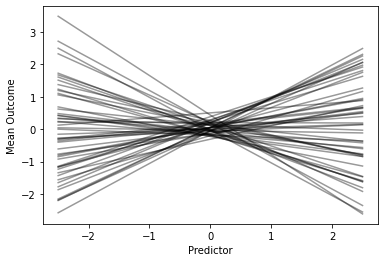

In [240]:
plot_predictive(prior_check, 'a', 'bW')

In [254]:
import arviz as az

In [267]:
def plot_linear_hdi(a_samples, b_samples, sigma_samples, x_seq):
    obs_samples = []
    for i in range(len(a_samples)):
        mu_sample = a_samples[i] + b_samples[i]*x_seq
        sigma_sample = sigma_samples[i]
        obs_samples.append(np.random.normal(mu_sample, sigma_sample))
    obs_samples = np.array(obs_samples)
    
    # The distribution over observed samples
    az.plot_hdi(x_seq, obs_samples, hdi_prob=0.97)
    
    # The MAP estimate of the relationship
    plt.plot(x_seq, a_samples.mean() + b_samples.mean()*x_seq, color='black')
    
    mu_pred = np.array([a_samples + b_samples*x for x in x_seq]).T
    # The distribution of the mean of mu.
    az.plot_hdi(x_seq, mu_pred, hdi_prob=0.97, color='blue')
    


/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


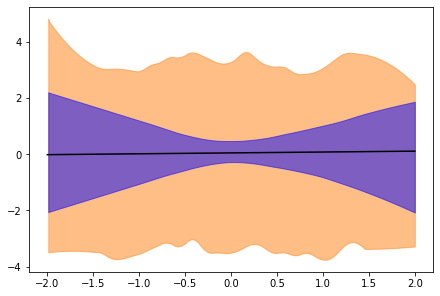

In [268]:
plot_linear_hdi(prior_check['a'], prior_check['bW'], prior_check['sigma'], np.linspace(-2, 2, num=30)) 

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


Text(0, 0.5, 'height')

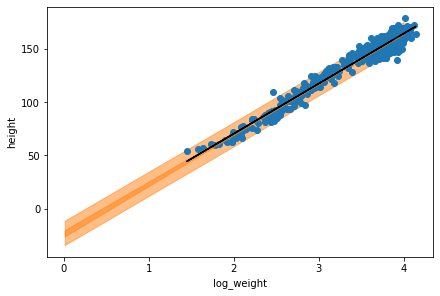

In [489]:
# The distribution over the heights.
az.plot_hdi(weight_seq, height_preds, hdi_prob=0.97)
# The MAP estimate of the relationship
plt.plot(d.log_weight, trace['alpha'].mean() + trace['beta'].mean()*(d.log_weight-d.log_weight.mean()), color='black')
# The observations
plt.scatter(d.log_weight, d.height)
# The distribution of the mean of mu.
az.plot_hdi(weight_seq, mu_pred, hdi_prob=0.97)

plt.xlabel('log_weight')
plt.ylabel('height')

In [248]:
with m:
    trace = pm.sample(1000, tune=1000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bW, bS, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


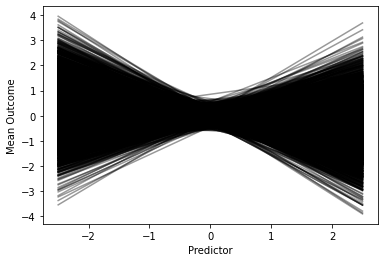

In [249]:
plot_predictive(trace, 'a', 'bW')

In [219]:
with pm.Model() as m:
    a = pm.Normal('a', 0, 0.2)
    bS = pm.Normal('bS', 0, 0.5)
    bW = pm.Normal('bW', 0, 0.5)
    sigma = pm.Exponential('sigma', 1)
    mu = a + bW * weight_std
    grade = pm.Normal('grade', mu, sigma, observed=grade_std)

In [220]:
with m:
    trace = pm.sample(1000, tune=1000)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bW, bS, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


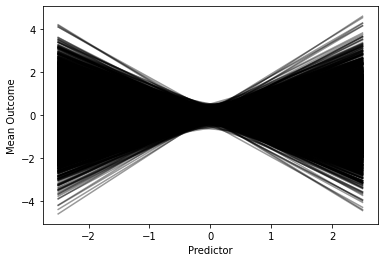

In [222]:
plot_predictive(trace, 'a', 'bS')